<a href="https://colab.research.google.com/github/jumbokh/nknu-class/blob/main/ML/PCA/classified_DatingWeb_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Define functions to connect to Google and change directories
def connectDrive():
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)

def changeDirectory(path):
    import os
    original_path = os.getcwd()
    os.chdir(path)
    new_path = os.getcwd()
    print("Original path: ",original_path)
    print("New path: ",new_path)

# Connect to Google Drive
connectDrive()

# Change path
changeDirectory("/content/drive/My Drive/github/DatedWeb/")

Mounted at /content/drive
Original path:  /content
New path:  /content/drive/My Drive/github/DatedWeb


In [2]:
%matplotlib inline
from sklearn import neighbors, datasets
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
color = sns.color_palette()
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing as pp 
from sklearn import utils
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import os, time, pickle, gzip
import datetime

In [3]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

In [4]:
from numpy import *
import operator
from os import listdir

def file2matrix(filename):
	fr = open(filename)
	numberOfLines = len(fr.readlines())
	returnMat = zeros((numberOfLines, 3))
	classLabelVector = []
	fr = open(filename)
	index = 0
	for line in fr.readlines():
		line = line.strip()
		listFromLine = line.split('\t')
		returnMat[index,:] = listFromLine[0:3]
		classLabelVector.append(str(listFromLine[3]))
		index += 1
	return returnMat, classLabelVector

In [5]:
def label_list(stri):
  li = stri.unique()
  num = len(li)
  licode = np.arange(num)
  dic = dict(zip(li,licode))
  ny = np.array([dic.get(item,item)  for item in stri])
  return(ny)

In [6]:
datingDataMat, datingLabels = file2matrix('datingTestSet.txt')

In [7]:
train_data, test_data, train_target, test_target = train_test_split(
    datingDataMat, datingLabels, test_size=0.3, train_size=0.7, random_state=123)

In [8]:
train_target = np.array(train_target)
test_target = np.array(test_target)
print(type(train_data),type(train_target),type(test_data),type(test_target))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [9]:
# Verify shape of datasets
print("Shape of train_data: ", train_data.shape)
print("Shape of train_target: ", train_target.shape)
print("Shape of test_data: ", test_data.shape)
print("Shape of test_target: ", test_target.shape)

Shape of train_data:  (700, 3)
Shape of train_target:  (700,)
Shape of test_data:  (300, 3)
Shape of test_target:  (300,)


In [10]:
# Create Pandas DataFrames from the datasets
train_index = range(0,len(train_data))
test_index = range(len(test_data))

X_train = pd.DataFrame(data=train_data,index=train_index)
y_train = pd.Series(data=train_target,index=train_index)

X_test = pd.DataFrame(data=test_data,index=test_index)
y_test = pd.Series(data=test_target,index=test_index)

In [11]:
# Create one-hot vectors for the labels
y_train_lbl = label_list(y_train)
y_test_lbl = label_list(y_test)

In [14]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, 2)
selector.fit(X_train, y_train_lbl)
selector.get_support()

array([ True,  True, False])

In [15]:
model_pl_knn = make_pipeline(
    StandardScaler(),
    SelectKBest(f_classif, 2),
    KNeighborsClassifier()
)
model_pl_knn.fit(X_train, y_train_lbl)
y_pred = model_pl_knn.predict(X_test)

In [16]:
print('整體正確率:',accuracy_score(y_test_lbl, y_pred).round(2))
confusion_matrix(y_test_lbl, y_pred)

整體正確率: 0.3


array([[  0,   3, 107],
       [  1,  87,   1],
       [ 97,   2,   2]])

In [17]:
# Principal Component Analysis
from sklearn.decomposition import PCA

n_components = 2
whiten = False
random_state = 42

pca = PCA(n_components=n_components, whiten=whiten, \
          random_state=random_state)

X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(data=X_train_PCA, index=train_index)

In [18]:
# Percentage of Variance Captured by 2 principal components
print("Variance Explained by all 2 principal components: ", \
      sum(pca.explained_variance_ratio_))

Variance Explained by all 2 principal components:  0.9999999994772992


In [19]:
# Define scatterplot function 
def scatterPlot(xDF, yDF, algoName):
    tempDF = pd.DataFrame(data=xDF.loc[:,0:1], index=xDF.index)
    tempDF = pd.concat((tempDF,yDF), axis=1, join="inner")
    tempDF.columns = ["First Vector", "Second Vector", "Label"]
    sns.lmplot(x="First Vector", y="Second Vector", hue="Label", \
               data=tempDF, fit_reg=False)
    ax = plt.gca()
    ax.set_title("Separation of Observations using "+algoName)

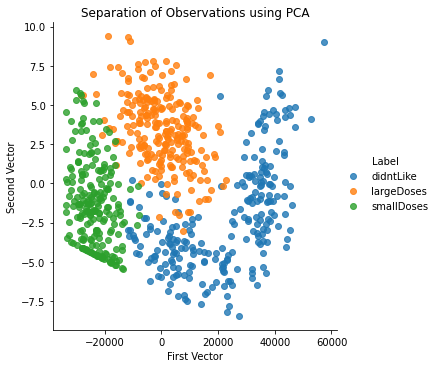

In [20]:
# View scatterplot
scatterPlot(X_train_PCA, y_train, "PCA")

In [21]:
# 羅吉斯迴歸
from sklearn.linear_model import LogisticRegression
model_pl_lr = make_pipeline(StandardScaler(), 
                            LogisticRegression(solver='liblinear'))
model_pl_lr.fit(X_train, y_train_lbl)
print(f'羅吉斯迴歸正確率{model_pl_lr.score(X_test, y_test_lbl).round(3)}')
# KNN
model_pl_knn = make_pipeline(StandardScaler(), KNeighborsClassifier())
model_pl_knn.fit(X_train, y_train_lbl)
print(f'KNN正確率{model_pl_knn.score(X_test, y_test_lbl).round(3)}')

羅吉斯迴歸正確率0.277
KNN正確率0.293
